In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

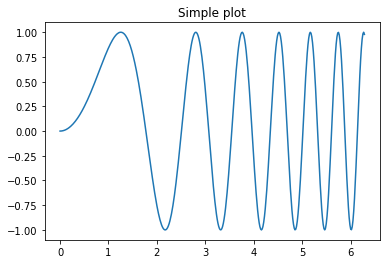

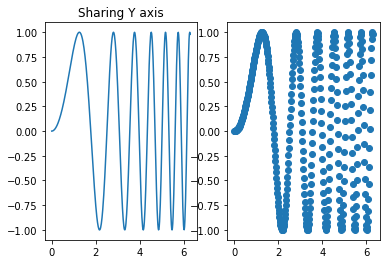

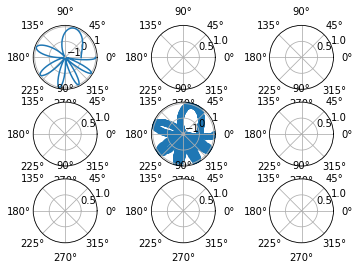

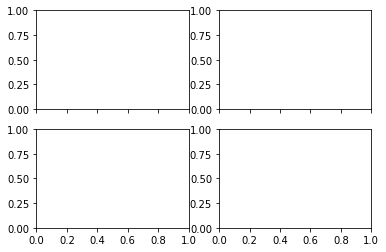

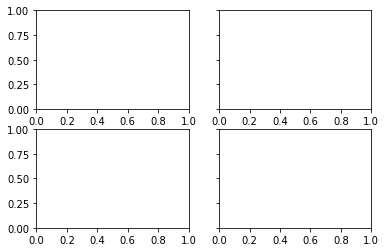

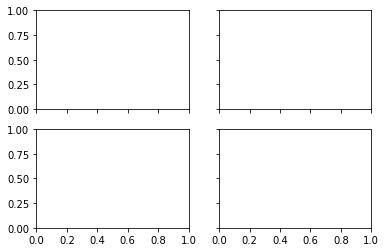

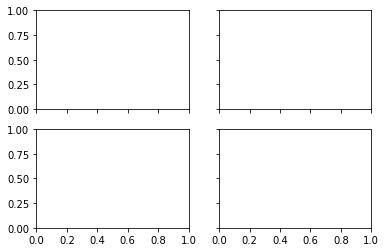

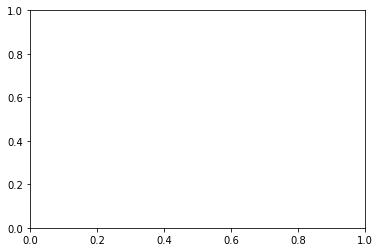

In [ ]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(3, 3, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)


# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)


Inserting Our pre processed dataset.

(<Figure size 432x288 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b83917210>,
       dtype=object))

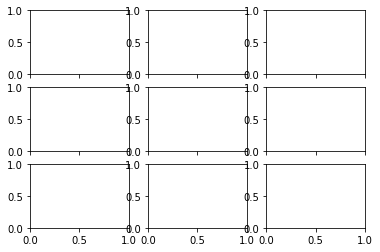

In [ ]:
plt.subplots(3, 3, sharex=True)

In [ ]:
df = pd.read_csv('final_data_with_AQI.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,Order,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
0,0,0,2020-04-22 00:00:30 UTC,22nd,65,29.5,1189,0.3,108,297,259,15,297
1,1,1,2020-04-22 00:04:21 UTC,22nd,65,29.7,1181,0.3,114,295,280,15,295
2,2,2,2020-04-22 00:08:11 UTC,22nd,65,29.7,1170,0.3,114,293,280,15,293
3,3,3,2020-04-22 00:12:01 UTC,22nd,65,29.4,1164,0.3,106,291,252,15,291
4,4,4,2020-04-22 00:15:51 UTC,22nd,65,29.7,1164,0.3,100,291,232,15,291


As we can see, there are 7 columns inlcuding 'Unnamed : 0'. which is unnecessary. Lets drop this column.

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1, inplace = True)

In [ ]:
df.head()

,created_at,Order,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
0,2020-04-22 00:00:30 UTC,22nd,65,29.5,1189,0.3,108,297,259,15,297
1,2020-04-22 00:04:21 UTC,22nd,65,29.7,1181,0.3,114,295,280,15,295
2,2020-04-22 00:08:11 UTC,22nd,65,29.7,1170,0.3,114,293,280,15,293
3,2020-04-22 00:12:01 UTC,22nd,65,29.4,1164,0.3,106,291,252,15,291
4,2020-04-22 00:15:51 UTC,22nd,65,29.7,1164,0.3,100,291,232,15,291


Now it looks good. we have all necessarry data.

In [ ]:
df.describe()

,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000
mean,66.061639,29.788476,917.155819,0.357236,117.192956,228.740429,266.916539,17.850306,277.916922
std,4.098606,1.457198,196.480686,0.128708,26.133197,46.998831,55.687190,6.378718,46.428379
min,50.000000,23.800000,570.000000,0.000000,34.000000,143.000000,56.000000,0.000000,145.000000
25%,64.000000,29.200000,767.000000,0.300000,98.000000,192.000000,225.000000,15.000000,244.750000
50%,66.000000,30.200000,872.000000,0.400000,115.000000,219.000000,283.000000,20.000000,291.000000
75%,69.000000,30.700000,1062.000000,0.400000,135.000000,266.000000,312.000000,20.000000,314.000000
max,95.000000,44.900000,1938.000000,1.700000,267.000000,418.000000,456.000000,85.000000,456.000000


The data describe shows there are 2612 rows.and there range is not same,there mean,std is cartaile value, all are higly varience.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  2612 non-null   object 
 1   Order       2612 non-null   object 
 2   humidity    2612 non-null   int64  
 3   Temp        2612 non-null   float64
 4   nh3         2612 non-null   int64  
 5   co          2612 non-null   float64
 6   pm          2612 non-null   int64  
 7   nh3_AQI     2612 non-null   int64  
 8   pm_AQI      2612 non-null   int64  
 9   co_AQI      2612 non-null   int64  
 10  AQI         2612 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 224.6+ KB


In [ ]:
#Except the 'Created_at' columns , all data types are float. That we want

In [ ]:
import seaborn as sns

Let's see the correlation

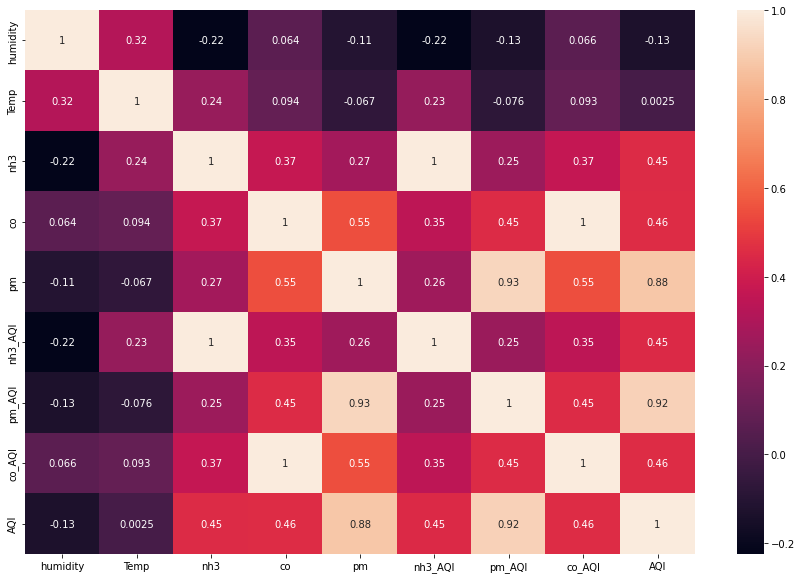

In [ ]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True)
plt.savefig("Correlation.jpg")
plt.show()

As we can see they are not highyly correlated with each other. Let's see the pairplot.

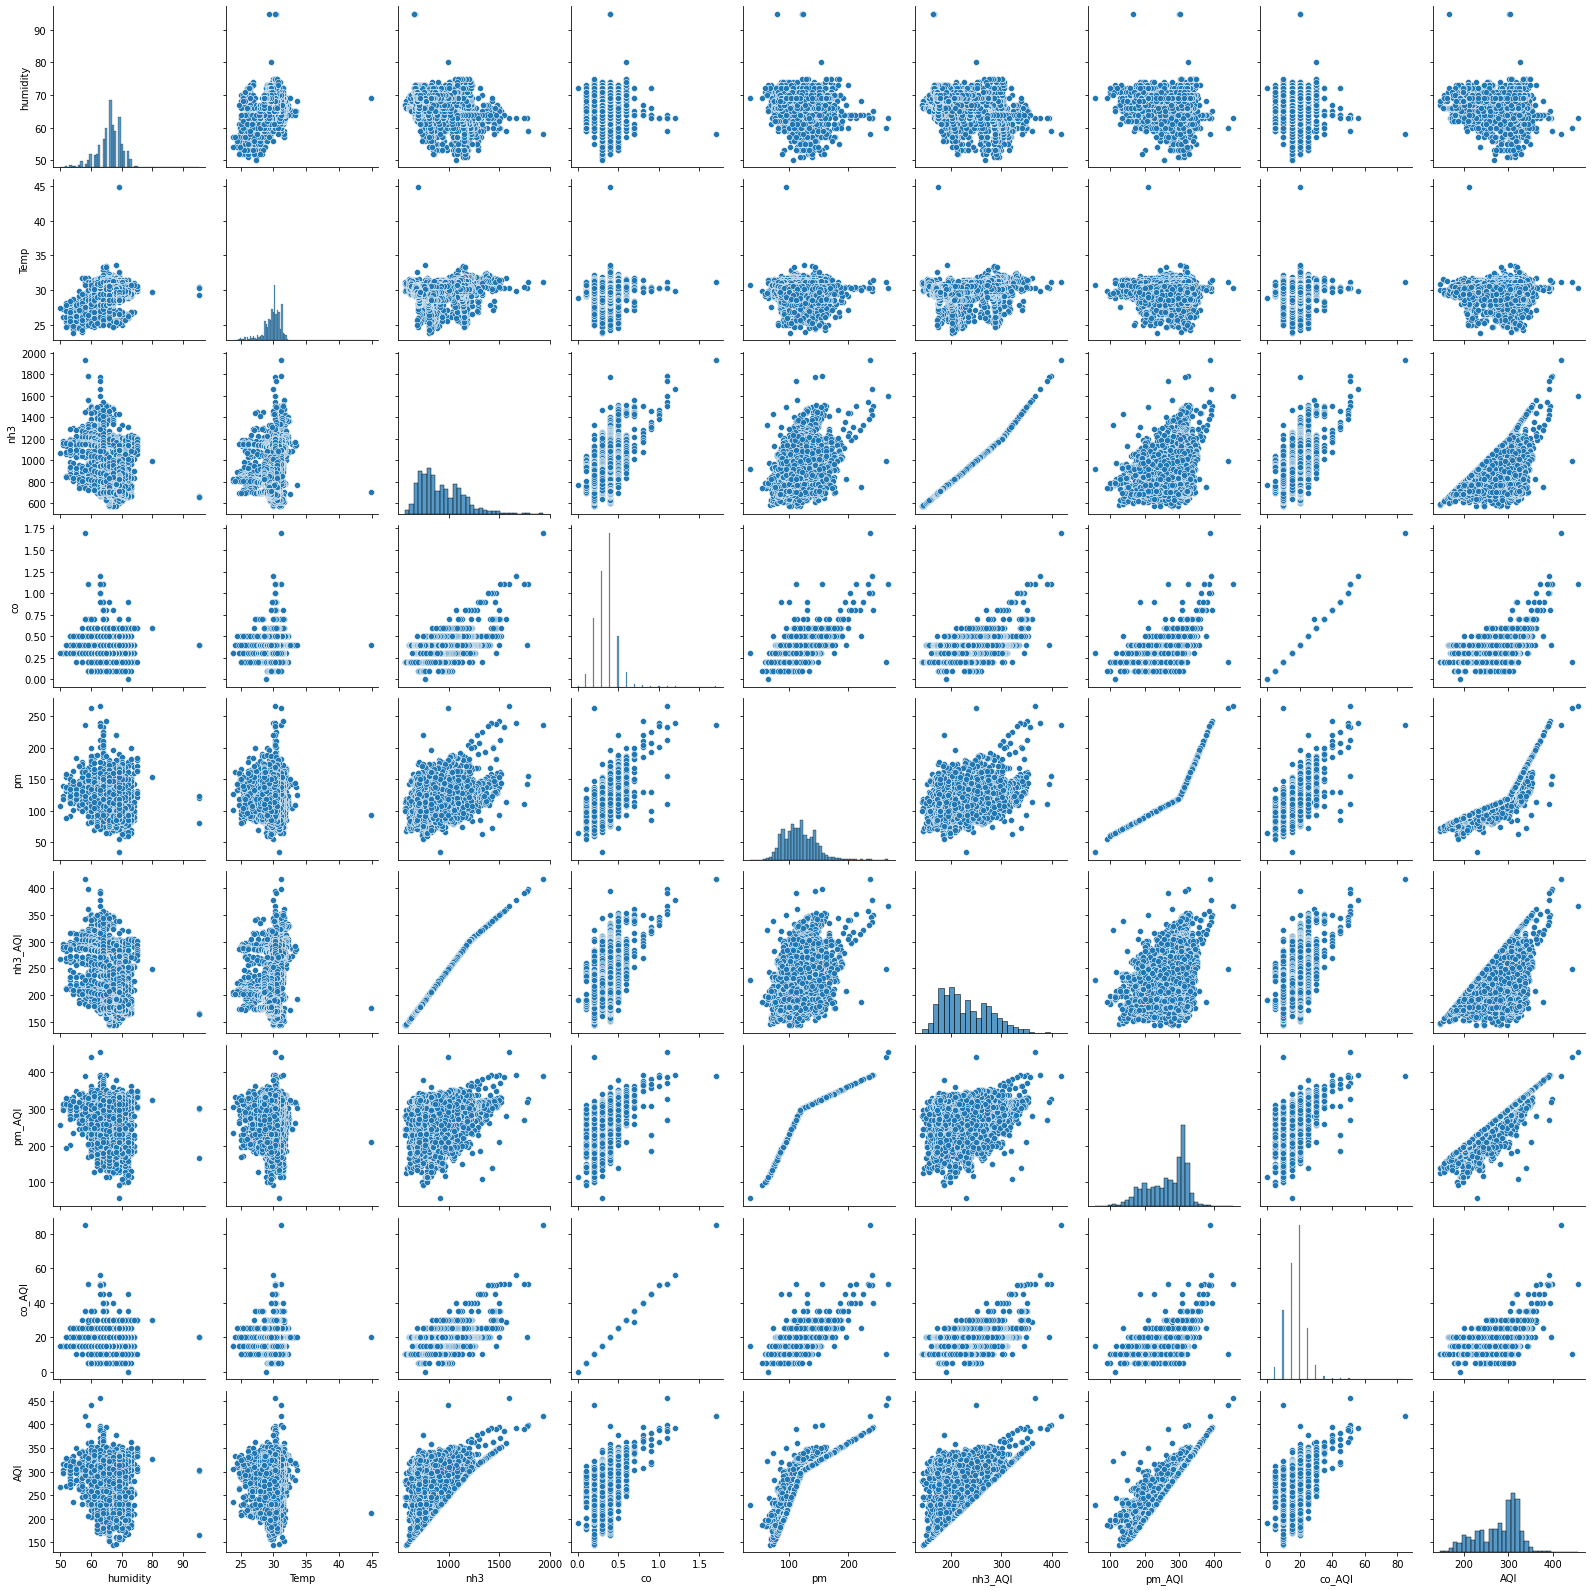

In [ ]:
sns.pairplot(df)

Let's plot time series data individully. Firsly week with humidity
There are 2612 rows, which is a lot of data with 3+ minutes intervel .which doesn't make sence.We want to predict all the parameters in one hour intervel. lets recreate hour daaset.

In [ ]:
df.set_index(['created_at'],inplace =True, drop = True)
df.index = pd.to_datetime(df.index)
jf = df.resample('H', label='right', closed='right').mean()
jf.dropna(inplace = True)
jf.head()

,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
created_at,,,,,,,,,
2020-04-22 01:00:00+00:00,65.5000,29.72500,1150.125,0.268750,107.8750,287.750000,258.0625,13.437500,289.4375
2020-04-22 02:00:00+00:00,65.7500,29.88125,1085.500,0.200000,97.1875,271.437500,222.8125,10.000000,272.0000
2020-04-22 03:00:00+00:00,65.0000,30.38000,1041.400,0.200000,93.4000,260.733333,210.4000,10.000000,261.0000
2020-04-22 04:00:00+00:00,65.3125,29.96250,962.875,0.100000,85.5625,241.000000,184.1250,5.000000,241.5000
2020-04-22 05:00:00+00:00,65.6000,30.24000,979.600,0.113333,96.6000,245.266667,220.8000,5.666667,247.8000


In [ ]:
#All done. We have succefully rebuiild the dataset with one hour intervel.

In [ ]:
jf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2020-04-22 01:00:00+00:00 to 2020-04-29 00:00:00+00:00
Freq: H
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humidity  168 non-null    float64
 1   Temp      168 non-null    float64
 2   nh3       168 non-null    float64
 3   co        168 non-null    float64
 4   pm        168 non-null    float64
 5   nh3_AQI   168 non-null    float64
 6   pm_AQI    168 non-null    float64
 7   co_AQI    168 non-null    float64
 8   AQI       168 non-null    float64
dtypes: float64(9)
memory usage: 13.1 KB


In [ ]:
jf.head()

,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
created_at,,,,,,,,,
2020-04-22 01:00:00+00:00,65.5000,29.72500,1150.125,0.268750,107.8750,287.750000,258.0625,13.437500,289.4375
2020-04-22 02:00:00+00:00,65.7500,29.88125,1085.500,0.200000,97.1875,271.437500,222.8125,10.000000,272.0000
2020-04-22 03:00:00+00:00,65.0000,30.38000,1041.400,0.200000,93.4000,260.733333,210.4000,10.000000,261.0000
2020-04-22 04:00:00+00:00,65.3125,29.96250,962.875,0.100000,85.5625,241.000000,184.1250,5.000000,241.5000
2020-04-22 05:00:00+00:00,65.6000,30.24000,979.600,0.113333,96.6000,245.266667,220.8000,5.666667,247.8000


In [ ]:
jf.describe()

,humidity,Temp,nh3,co,pm,nh3_AQI,pm_AQI,co_AQI,AQI
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,66.067804,29.790409,916.402225,0.356732,117.118580,228.564601,266.792804,17.825432,277.796457
std,3.492777,1.278979,186.721284,0.114670,15.639738,44.990339,30.562232,5.702018,27.000615
min,56.066667,26.240000,598.714286,0.100000,85.562500,150.071429,184.125000,5.000000,224.466667
25%,64.406250,29.093646,770.750000,0.300000,105.742708,192.836458,244.359375,15.000000,258.125000
50%,66.250000,30.075000,857.100000,0.380000,116.904167,214.831250,269.156250,19.000000,274.900000
75%,68.698958,30.687500,1059.950000,0.412500,124.600000,265.483333,288.921875,20.625000,296.640625
max,73.600000,32.356250,1429.000000,0.756250,189.625000,338.750000,353.500000,37.812500,353.500000


Now we have all 7 days data with one hour intervel. so our target is now, train first six days data and forecast the final day data.

In [ ]:
# Create Training and Test
def split_data(data):
  train = data[:144]
  test = data[144:]
  return train, test

In [ ]:
train_humidity, test_humidity = split_data(jf.humidity)
train_pm,test_pm = split_data(jf.pm)
train_co,test_co = split_data(jf.co)
train_temp,test_temp = split_data(jf.Temp)
train_nh3,test_nh3 = split_data(jf.nh3) 
train_aqi,test_aqi = split_data(jf.AQI)
len(test_co)

24

In [ ]:
train_temp.describe(), test_temp.describe()

(count    144.000000
 mean      29.839292
 std        1.325224
 min       26.240000
 25%       29.093646
 50%       30.175000
 75%       30.750625
 max       32.356250
 Name: Temp, dtype: float64, count    24.000000
 mean     29.497113
 std       0.923805
 min      27.020000
 25%      29.110937
 50%      29.513333
 75%      30.254687
 max      30.533333
 Name: Temp, dtype: float64)

Now we have to test all the parameters to check wheather it's stationay or not using ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


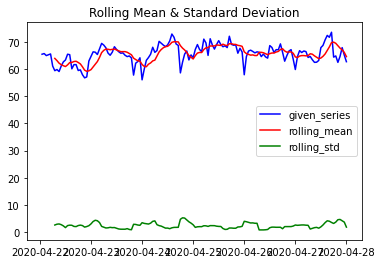

Results of Dickey-Fuller Test:
Test Statistic                  -4.951479
p-value                          0.000028
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [ ]:
test_for_stationary(train_humidity)

According to dicky fuller test, Test stat is less than critical value. and p-values also significantly smaller than 0.05.Now let's test pm


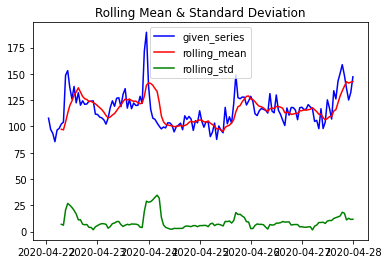

Results of Dickey-Fuller Test:
Test Statistic                  -4.513347
p-value                          0.000186
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [ ]:
test_for_stationary(train_pm)

Looks good.lets look over co.

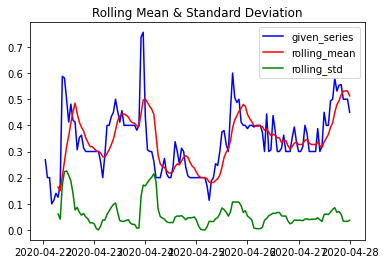

Results of Dickey-Fuller Test:
Test Statistic                  -3.236140
p-value                          0.017986
#Lags Used                       2.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


In [ ]:
test_for_stationary(train_co)

This is also looks good. lets look over Nh3

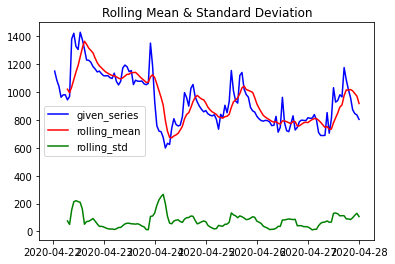

Results of Dickey-Fuller Test:
Test Statistic                  -2.672285
p-value                          0.078958
#Lags Used                       5.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [ ]:
test_for_stationary(train_nh3)

Here is it.Nh3, which is not statinary at all.the p value is greater than the threshold,test stat is also greater than the critical value.
we have to make it non stationary using log transformed or other method.before make it stationary , lets test tempereture.

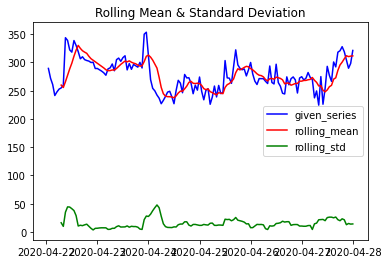

Results of Dickey-Fuller Test:
Test Statistic                  -3.509467
p-value                          0.007747
#Lags Used                       1.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [ ]:
test_for_stationary(train_aqi)

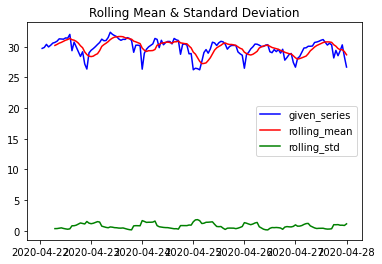

Results of Dickey-Fuller Test:
Test Statistic                  -3.868655
p-value                          0.002278
#Lags Used                       4.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [ ]:
test_for_stationary(train_temp)

it looks good. But Critical value is almost equal to test stat. which is not good. but okay for. Later on we will tune the parameter. Then , if need , we will change.For now lets apply log transform technique on nh3

In [ ]:
def log_transformed(data):

  ts_logtransformed = np.log(data)
  plt.plot(ts_logtransformed)
  return ts_logtransformed

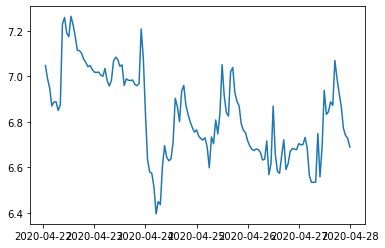

In [ ]:
ts_logtransformed_nh3 = log_transformed(train_nh3)

Smooth it by rolling average

In [ ]:
def rolling_avg(data):

  Rolling_average = data.rolling(window = 7, center= False).mean()
  plt.plot(data, label = 'Log Transformed')
  plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
  plt.legend(loc = 'best')
  return Rolling_average

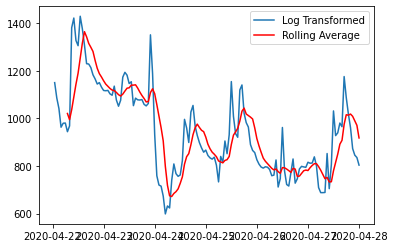

In [ ]:
Rolling_average_nh3 = rolling_avg(train_nh3)

In [ ]:
def log_rol_def(data1,data2):
  log_Rolling_difference = data1 - data2
  log_Rolling_difference.dropna(inplace=True)
  plt.plot(log_Rolling_difference)
  return log_Rolling_difference

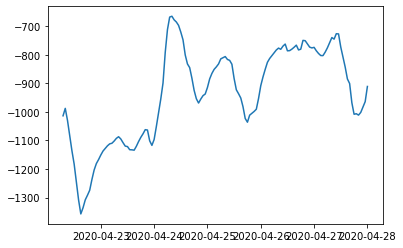

In [ ]:
log_Rolling_diff_nh3 = log_rol_def(ts_logtransformed_nh3,Rolling_average_nh3)

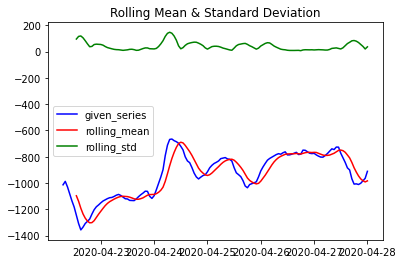

Results of Dickey-Fuller Test:
Test Statistic                  -1.928237
p-value                          0.318896
#Lags Used                      12.000000
Number of Observations Used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64


In [ ]:
test_for_stationary(log_Rolling_diff_nh3)

It looks over differencing.the P value is greater than 0.05, and the critical value(1%) is also less than our test statistics. theoritically , now it is not stationary. lets apply log transformed method.

Now it looks cool.The critical value(1%) is greater than our test stat. which means , we are 99% sure that, our dataset is statioanry.P value is also very less than threshold.So we got out d term for Humidity which is 1.
Now it's time to check our P and q term using acf and pcf plot.

In [ ]:
def diff_logtrans(data, n):
  ts_diff_logtrans = data - data.shift(n)
  plt.plot(ts_diff_logtrans)
  return ts_diff_logtrans

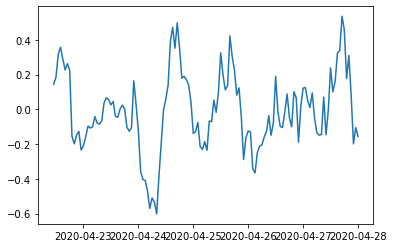

In [ ]:
ts_diff_logtrans_nh3 = diff_logtrans(ts_logtransformed_nh3,10)

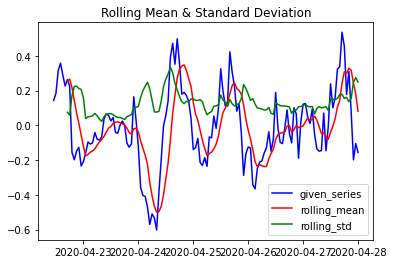

Results of Dickey-Fuller Test:
Test Statistic                  -2.932651
p-value                          0.041681
#Lags Used                      10.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [ ]:
ts_diff_logtrans_nh3.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans_nh3)

A little change , but not up to the mar. lets apply differnecing.

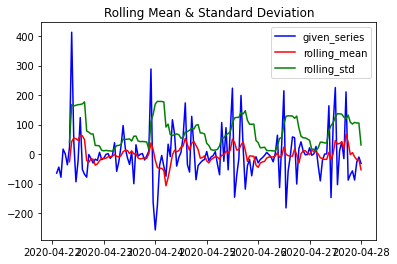

Results of Dickey-Fuller Test:
Test Statistic                -1.072988e+01
p-value                        2.998797e-19
#Lags Used                     1.000000e+00
Number of Observations Used    1.410000e+02
Critical Value (1%)           -3.477601e+00
Critical Value (5%)           -2.882266e+00
Critical Value (10%)          -2.577822e+00
dtype: float64


In [ ]:
t_train_nh3 = train_nh3.diff()
#t_train_humidity = t_train_humidity.dropna(inplace=True)
test_for_stationary(t_train_nh3[1:])

Now it looks stationary. As we can see the test stat is lower than the critical value(1%) and also the p value is also less than 0.05(threshold)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

def acf_pcf(data):

  pyplot.figure()
  pyplot.subplot(211)
  plot_acf(data, ax=pyplot.gca(),lags=40)
  pyplot.subplot(212)
  plot_pacf(data, ax=pyplot.gca(), lags=50)
  pyplot.show()

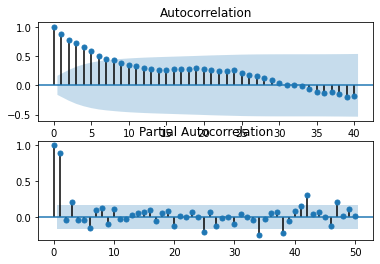

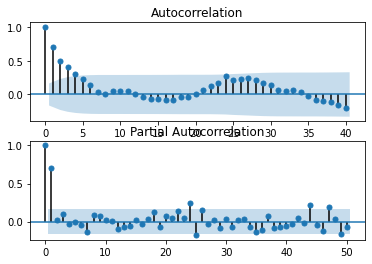

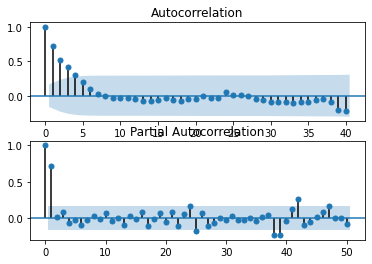

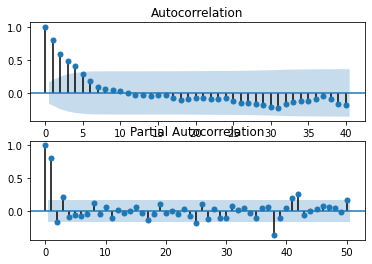

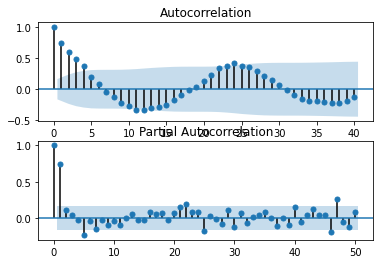

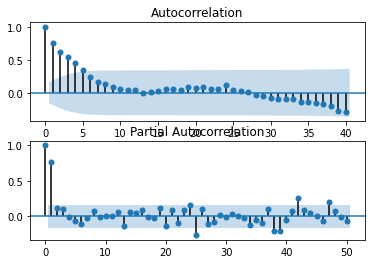

In [ ]:
acf_pcf(train_nh3)
acf_pcf(train_humidity)
acf_pcf(train_pm)
acf_pcf(train_co)
acf_pcf(train_temp)
acf_pcf(train_aqi)

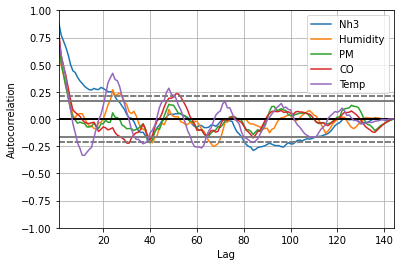

In [ ]:
from pandas.plotting import autocorrelation_plot as acf

acf(train_nh3, label="Nh3")
acf(train_humidity, label = 'Humidity')
acf(train_pm, label = "PM")
acf(train_co, label = "CO")
acf(train_temp, label = "Temp")

In [ ]:
# This is the ACF and PACF plot of all the parameters. 
# As we can see , in case Temperature , there is bit of seasonality.
# for this we can set the d=1 and tune other parameters (p,q). 
# the lower the AIC,BIC the better the model.ACF,PACF just an assumption of p,Q.
# We need to tune the model and check which combination , gives us better accuracy.
# In case of that, we assumed , for CO, p,d,q =  1, 0, 2(ARMA), PM p,d,q=3,0,1 (ARMA) 
# temp 5,1,1(ARIMA) humidity 1,1,1(ARIMA),nh3 p,d,q= 2,1,3(ARIMA)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def arima (p,d,q,train):


  model = ARIMA(train, order=(p, d, q))  
  results_ARIMA = model.fit(trend= 'nc', disp=-1)  
  plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p = '+str(p)+','+'q = '+str(q))
  RSS =results_ARIMA.fittedvalues-train
  RSS.dropna(inplace=True)
  plt.title('RSS: %.4f'% sum(RSS**2))
  plt.legend(loc='best')
  return results_ARIMA,RSS 


                             ARIMA Model Results                              
Dep. Variable:                  D.nh3   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -835.399
Method:                       css-mle   S.D. of innovations             83.307
Date:                Thu, 17 Feb 2022   AIC                           1680.797
Time:                        17:29:01   BIC                           1695.611
Sample:                    04-22-2020   HQIC                          1686.817
                         - 04-28-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.nh3    -0.1887      0.331     -0.570      0.570      -0.838       0.460
ar.L2.D.nh3    -0.0706      0.333     -0.212      0.832      -0.723       0.581
ma.L1.D.nh3     0.2001      0.327      0.611    

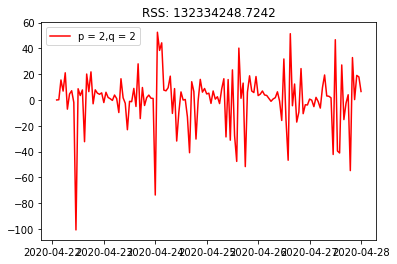

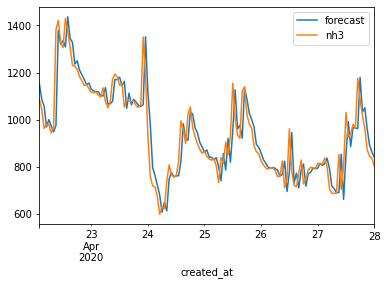

In [ ]:
model_fit_nh3,rss_nh3=arima(2,1,2,train_nh3)
model_fit_nh3.plot_predict(dynamic= False)
print(model_fit_nh3.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.humidity   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -334.142
Method:                       css-mle   S.D. of innovations              2.492
Date:                Thu, 17 Feb 2022   AIC                            674.284
Time:                        17:29:02   BIC                            683.173
Sample:                    04-22-2020   HQIC                           677.896
                         - 04-28-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.D.humidity     0.6739      0.076      8.855      0.000       0.525       0.823
ma.L1.D.humidity    -0.9707      0.031    -30.842      0.000      -1.032      -0.909
                            

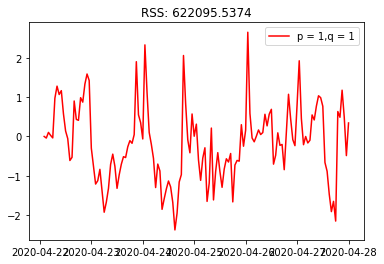

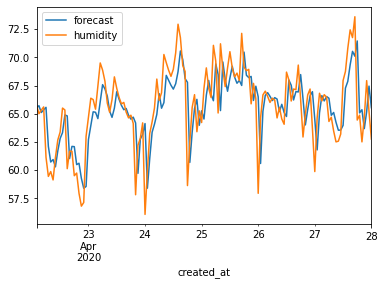

In [ ]:
model_fit_humidity,rss_humidity=arima(1,1,1,train_humidity)
model_fit_humidity.plot_predict(dynamic= False)
print(model_fit_humidity.summary())

                              ARMA Model Results                              
Dep. Variable:                     co   No. Observations:                  144
Model:                     ARMA(1, 2)   Log Likelihood                 176.118
Method:                       css-mle   S.D. of innovations              0.070
Date:                Thu, 17 Feb 2022   AIC                           -344.236
Time:                        17:29:03   BIC                           -332.356
Sample:                    04-22-2020   HQIC                          -339.409
                         - 04-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.co       0.9908      0.009    105.277      0.000       0.972       1.009
ma.L1.co       0.0069      0.085      0.082      0.935      -0.159       0.173
ma.L2.co      -0.3013      0.081     -3.697      0.0

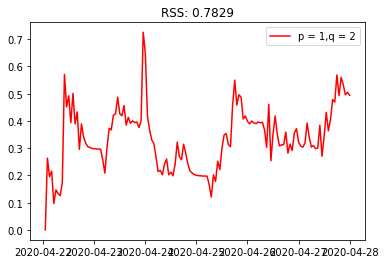

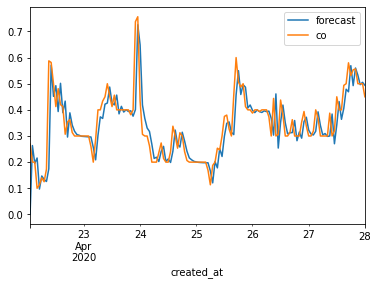

In [ ]:
model_fit_co,rss_co = arima(1,0,2,train_co)

model_fit_co.plot_predict(dynamic= False)
print(model_fit_co.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                     pm   No. Observations:                  144
Model:                     ARMA(3, 1)   Log Likelihood                -556.501
Method:                       css-mle   S.D. of innovations             11.121
Date:                Thu, 17 Feb 2022   AIC                           1123.002
Time:                        17:29:04   BIC                           1137.851
Sample:                    04-22-2020   HQIC                          1129.036
                         - 04-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.pm       1.7256   9.26e-06   1.86e+05      0.000       1.726       1.726
ar.L2.pm      -0.7046   8.88e-06  -7.93e+04      0.000      -0.705      -0.705
ar.L3.pm      -0.0209   9.83e-07  -2.13e+04      0.0

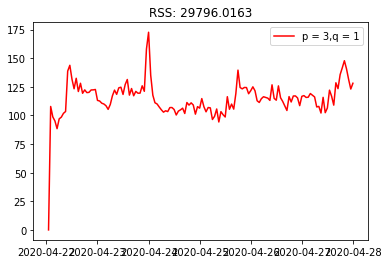

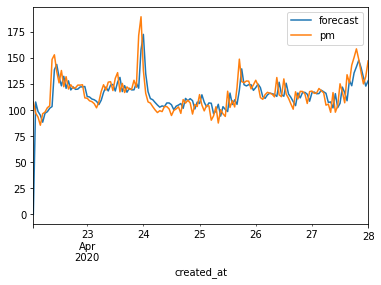

In [ ]:
model_fit_pm,rss_pm = arima(3,0,1,train_pm)
model_fit_pm.plot_predict(dynamic= False)
print(model_fit_pm.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AQI   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -619.614
Method:                       css-mle   S.D. of innovations             18.244
Date:                Thu, 17 Feb 2022   AIC                           1245.227
Time:                        17:29:04   BIC                           1254.116
Sample:                    04-22-2020   HQIC                          1248.839
                         - 04-28-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.AQI     0.7749      0.056     13.931      0.000       0.666       0.884
ma.L1.D.AQI    -0.9997      0.144     -6.945      0.000      -1.282      -0.718
                                    Roots       

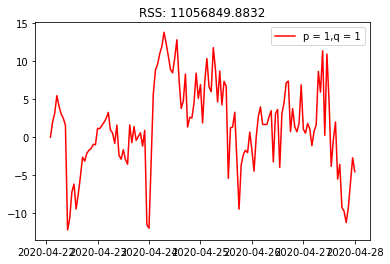

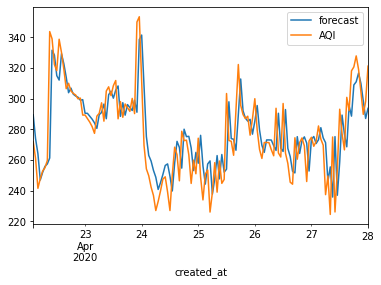

In [ ]:
model_fit_aqi,rss_aqi = arima(1,1,1,train_aqi)
model_fit_aqi.plot_predict(dynamic= False)
print(model_fit_aqi.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                  143
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -181.216
Method:                       css-mle   S.D. of innovations              0.854
Date:                Thu, 17 Feb 2022   AIC                            376.433
Time:                        17:29:05   BIC                            397.173
Sample:                    04-22-2020   HQIC                           384.860
                         - 04-28-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Temp     0.6714      0.084      8.004      0.000       0.507       0.836
ar.L2.D.Temp     0.0981      0.099      0.988      0.325      -0.097       0.293
ar.L3.D.Temp     0.0559      0.101      0.55

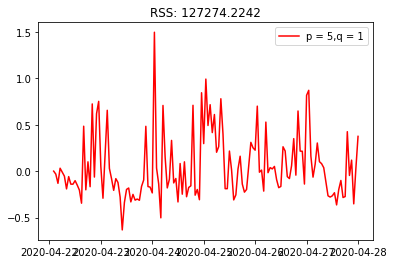

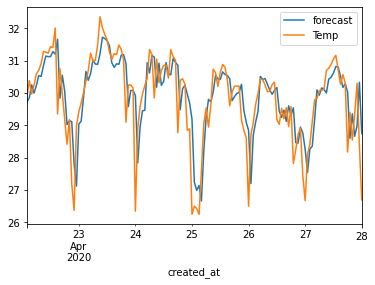

In [ ]:
model_fit_temp,rss_temp= arima(5,1,1,train_temp)
model_fit_temp.plot_predict(dynamic= False)
print(model_fit_temp.summary())

In [ ]:
train_pm.describe()

count    144.000000
mean     116.137132
std       16.209398
min       85.562500
25%      104.165625
50%      115.829167
75%      124.375000
max      189.625000
Name: pm, dtype: float64

In [ ]:
def forecast():
    
    models = [model_fit_aqi,model_fit_co,model_fit_humidity,model_fit_nh3,model_fit_pm,model_fit_temp]
    n = 24
    train = [train_aqi,train_co,train_humidity,train_nh3,train_pm,train_temp]
    test = [test_aqi,test_co,test_humidity,test_nh3,test_pm,test_temp]
    para = ['AQI','CO ($mg/m^3$)','Humidity($\%$)','NH$_3$ ($μg/m^3$)','PM$_{2.5}$ ($μg/m^3$)', 'Temperature ($°C$)']
    fig, ax = plt.subplots(3, 2, sharex=True,figsize=(22,14))
    # Forecast
    val = 0;
    
    for i in range(3):
      for j in range(2):
        #fitted = models[val]
        #train = train1[val]
        #test = para[val]
        par = para[val]
        
        fc, se, conf = models[val].forecast(n, alpha=0.05)  # 95% conf
        
        # Make as pandas series
        fc_series = pd.Series(fc, index=test_aqi.index)
        # fc_series = pd.Series(fc, index=test[val].index)
        lower_series = pd.Series(conf[:, 0], index=test[val].index)
        upper_series = pd.Series(conf[:, 1], index=test[val].index)
        
        
        # Plot
        styles1 = ['b-','ro-','g-','ro']
        plt.style.use('fivethirtyeight')
        ax[i,j].plot(train[val],'grey', label='training')
        ax[i,j].plot(test[val],'r', label='actual')
        ax[i,j].plot(fc_series,'g', label='forecast')
        ax[i,j].fill_between(lower_series.index, lower_series, upper_series, alpha=.2)
        ax[i,j].set_title('Forecast vs Actuals of '+par)
        ax[i,j].legend(loc='upper left')
        ax[2,0].set_xlabel("Date")
        ax[2,1].set_xlabel("Date")
        ax[i,j].set_ylabel(par)
        val+=1
    
    plt.savefig('/content/drive/MyDrive/all in one graph3'+'.png',dpi = 300)
    plt.show()
    
    return fc_series

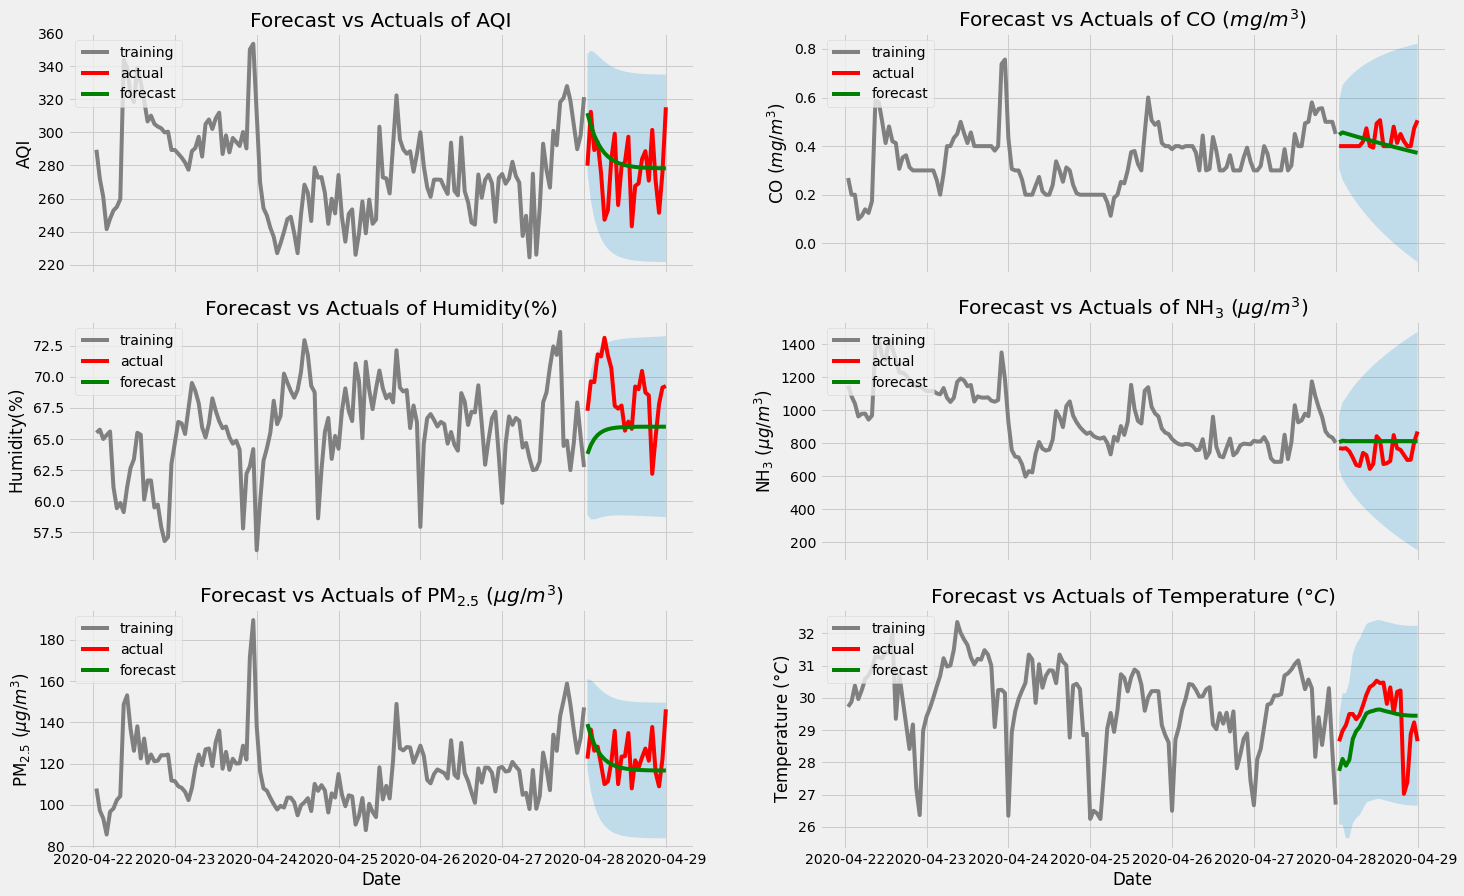

created_at
2020-04-28 01:00:00+00:00    27.733762
2020-04-28 02:00:00+00:00    28.104332
2020-04-28 03:00:00+00:00    27.893978
2020-04-28 04:00:00+00:00    28.079821
2020-04-28 05:00:00+00:00    28.721866
2020-04-28 06:00:00+00:00    28.966277
2020-04-28 07:00:00+00:00    29.092004
2020-04-28 08:00:00+00:00    29.308146
2020-04-28 09:00:00+00:00    29.518054
2020-04-28 10:00:00+00:00    29.570857
2020-04-28 11:00:00+00:00    29.598832
2020-04-28 12:00:00+00:00    29.633090
2020-04-28 13:00:00+00:00    29.638805
2020-04-28 14:00:00+00:00    29.606084
2020-04-28 15:00:00+00:00    29.578020
2020-04-28 16:00:00+00:00    29.554212
2020-04-28 17:00:00+00:00    29.526506
2020-04-28 18:00:00+00:00    29.498537
2020-04-28 19:00:00+00:00    29.479660
2020-04-28 20:00:00+00:00    29.466115
2020-04-28 21:00:00+00:00    29.455555
2020-04-28 22:00:00+00:00    29.448892
2020-04-28 23:00:00+00:00    29.446650
2020-04-29 00:00:00+00:00    29.446516
Freq: H, dtype: float64

In [ ]:
forecast()

In [ ]:

predicted_aqi = forecast(model_fit_aqi,24,train_aqi,test_aqi,"AQI")

predicted_humidity = forecast(model_fit_humidity,24,train_humidity,test_humidity,"Humidity")


In [ ]:
li = [ model_fit_aqi, model_fit_co]

li[0]

In [ ]:

predicted_humidity = forecast(model_fit_humidity,24,train_humidity,test_humidity,"Humidity")


In [ ]:
predicted_nh3 = forecast(model_fit_nh3,24,train_nh3,test_nh3, "Ammonia")


In [ ]:
predicted_pm = forecast(model_fit_pm,24,train_pm,test_pm,"PM")

In [ ]:
predicted_co = forecast(model_fit_co,24,train_co,test_co,"CO")

In [ ]:
predicted_temp = forecast(model_fit_temp,24,train_temp,test_temp,"Temperature")

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    


    return np.mean(np.abs(y_pred - y_true)/np.abs(y_true))*100 



In [ ]:
mape_aqi = mean_absolute_percentage_error(test_aqi,predicted_aqi)
print("Mape of AQI "+str(mape_aqi))

In [ ]:
mape_humidity = mean_absolute_percentage_error(test_humidity,predicted_humidity)
print("Mape of humidity "+str(mape_humidity))

In [ ]:
mape_nh3 = mean_absolute_percentage_error(test_nh3,predicted_nh3)
print("Mape of nh3 "+str(mape_nh3))

In [ ]:
mape_co = mean_absolute_percentage_error(test_co,predicted_co)
print("Mape of CO "+str(mape_co))

In [ ]:
mape_temp = mean_absolute_percentage_error(test_temp,predicted_temp)
print("Mape of Temperature "+str(mape_temp))

In [ ]:
mape_pm = mean_absolute_percentage_error(test_pm,predicted_pm)
print("Mape of PM "+str(mape_pm))

In [ ]:
df2 = pd.DataFrame()

In [ ]:
li = pd.to_datetime(train_nh3.index)

In [ ]:
df2['ds'] = li.tz_localize(None)

In [ ]:
df2['y'] = train_pm.values

In [ ]:
df2.dtypes

In [ ]:
li.tz_localize(None)

In [ ]:
df2.head()

TIme series analysis using prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
P=Prophet() 

In [ ]:

P.fit(df2)

In [ ]:
future = P.make_future_dataframe( periods=24)  # Let's predict the next month's average prices

future.tail()

In [ ]:
df['nh3']
df3 = pd.DataFrame()

In [ ]:
li = pd.to_datetime(jf.index)

In [ ]:
df3['ds'] = li.tz_localize(None)

In [ ]:
df3['y'] = jf['nh3'].values

In [ ]:
df3.tail()

In [ ]:
df3.drop('y',axis = 1, inplace = True)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

forecast = P.predict(df3)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P,horizon='24 Hours')

df_cv.tail()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

p=2, q=8